In [38]:
# import libraries/dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

contacts = ("data/contacts.tsv")
contacts = pd.read_csv(contacts, sep="\t")

searches = ("data/searches.tsv")
searches = pd.read_csv(searches, sep="\t")

### Assignment 

+ My new Manager at Airbnb wants to understand the following:


+ What guests are searching for in Dublin
+ Which inquiries do hosts typically accept
+ What gap exists between guest demand and host supply
+ Any other information through data that can help paint a clear picture of the demand/supply in Dublin

### Data Exploration

+ Understand the dataset
+ Look for null values and the % it makes for each column

In [2]:
contacts.head(5)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [3]:
searches.head(5)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [4]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [5]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [6]:
contacts.isnull().sum()

id_guest             0
id_host              0
id_listing           0
ts_contact_at        0
ts_reply_at        604
ts_accepted_at    4196
ts_booking_at     5649
ds_checkin           0
ds_checkout          0
n_guests             0
n_messages           0
dtype: int64

In [7]:
searches.isnull().sum()

ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64

### Starting with the searches dataset

+ Remove 'filter_neighbourhood' column because 96% of it is null values
+ Since it could lead to inaccurate assumptions, therefore it is best to remove it

In [8]:
# dropping the filter_neighbourhood column

searches = searches.drop(columns = ['filter_neighborhoods'])

In [9]:
# Converting date columns to datetime to analyze data more effectively

import datetime

searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

# understanding how soon the customer wants the room

searches['length_prep'] = searches['ds_checkin'] - searches['ds']

In [10]:
# describing searches dataset

searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_prep
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


In [11]:
# calculating skews in dataset

display(searches.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

### Distributions

+ Find the number of people searched for when booking rooms
+ It is important to understand the most searched number of guests for our exploration and to inform the incoming Manager
+ Start with minimum and maximum guests

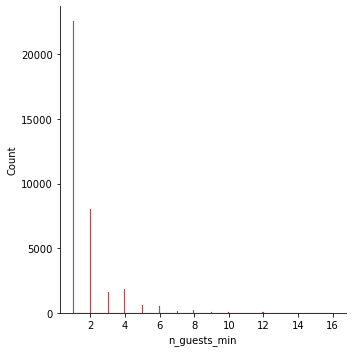

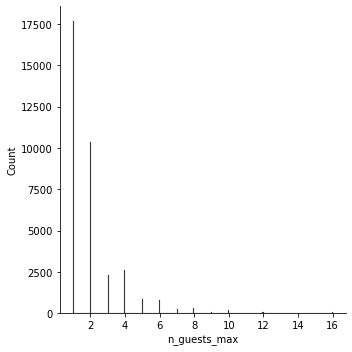

In [12]:
# distribution plot of the min number of guests and max number of guests

sns.displot(searches, x = 'n_guests_min', color = 'brown')
sns.displot(searches, x = 'n_guests_max', color = 'black')
plt.show();

## Observations

+ Both graph distributions are somewhat similar
+ In both minimum and maximum graphs, 1 is the most popular of guests searched for
+ 2 is the second most popular

### What can this mean for the business?

+ It's still early to tell, but investing in smaller accomodations could be a good investment in Dublin

### Next

+ Let's look at the dates searched and the count for the respective date to see what that distribution looks like

In [13]:
searches.head(5)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,length_prep
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",8 days
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,8 days
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,NaN,NaT
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",38 days
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,NaN,NaT


In [14]:
dates_searched = searches.groupby('ds')['id_user'].count().reset_index().rename({"id_user" : "searches count"}, axis = 1)
dates_searched['date'] = pd.to_datetime(dates_searched['ds']).dt.date
dates_searched

,ds,searches count,date
0,2014-10-01,2628,2014-10-01
1,2014-10-02,2627,2014-10-02
2,2014-10-03,2363,2014-10-03
3,2014-10-04,2226,2014-10-04
4,2014-10-05,2612,2014-10-05
5,2014-10-06,2758,2014-10-06
6,2014-10-07,2606,2014-10-07
7,2014-10-08,2584,2014-10-08
8,2014-10-09,2430,2014-10-09
9,2014-10-10,2081,2014-10-10


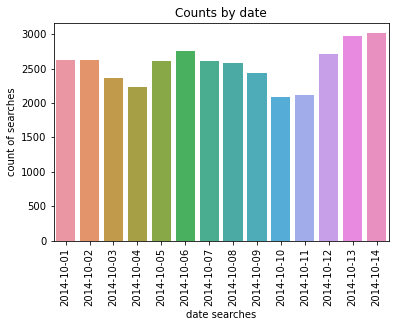

In [15]:
sns.barplot(x = 'date', y = 'searches count', data = dates_searched)
plt.title('Counts by date')
plt.xlabel('date searches')
plt.ylabel('count of searches')
plt.xticks(rotation = 90)

plt.show();

### Takeaways from the visual above

+ All the searches were between October 1st to October 14th
+ There are some days that received more searches, but there isn't any major fluctuations


### Next steps

+ So far, rooms for 1 and 2 seem to be the most popular choices in Dublin
+ Now let's understand the financial side of the searches
+ What is the maximum price are willing to pay? And the lowest?
+ What does the financial distribution look like grouped by hundreds?

In [16]:
# trying to understand the % of searches above $500 per room

max_price_searches = round(len(searches[searches['filter_price_max'] > 500]) / len(searches['filter_price_max'])*100,2)
print(f"The percentage of searches above $500 per room is {max_price_searches}%")

The percentage of searches above $500 per room is 6.14%


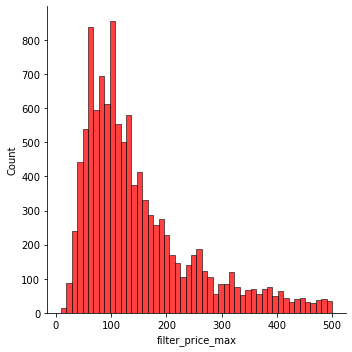

In [17]:
# now let's work on the financial distribution
# also removing anything higher than $500

search_price_distr = searches[searches['filter_price_max'] <= 500]

palette = sns.color_palette('bright')

sns.displot(x = search_price_distr['filter_price_max'], color = 'red')
plt.show();

### Let's understand what % of searches had a maximum of price of $200 or below

+ Looking at the graph above, it looks like it is a large percentage of searches
+ With most of the searches coming in closer to $100 a night
+ We know from the searches that the most popular number of guests was 1 or 2

In [18]:
searches_under_200 = round(len(search_price_distr[search_price_distr['filter_price_max'] <= 200]) / len(search_price_distr['filter_price_max']) * 100, 1)

print(f"The percentage of searches under $200/night per room is {searches_under_200}%")

The percentage of searches under $200/night per room is 77.5%


In [19]:
searches_under_100 = round(len(search_price_distr[search_price_distr['filter_price_max'] <= 100]) / len(search_price_distr['filter_price_max']) * 100, 1)

print(f"The percentage of searches under $100/night per room is {searches_under_100}%")

The percentage of searches under $100/night per room is 40.6%


In [20]:
guests_under_200 = round(len(search_price_distr[search_price_distr['n_guests_max'] <= 2]) / len(search_price_distr[search_price_distr['filter_price_max'] <= 200]) * 100, 1)
guests_under_100 = round(len(search_price_distr[search_price_distr['n_guests_max'] <= 1]) / len(search_price_distr[search_price_distr['filter_price_max'] <= 100]) * 100, 1)

print(f"For the searches under $200/per room per night, {guests_under_200}% of the searches had a filter for a maximum of 2 guests. When the search was for $100/ per room per night, {guests_under_100}% were for one guest")
print("This means the average customer is willing to spend close to $100/per room per night")

For the searches under $200/per room per night, 98.8% of the searches had a filter for a maximum of 2 guests. When the search was for $100/ per room per night, 73.8% were for one guest
This means the average customer is willing to spend close to $100/per room per night


### Key Takeaways

+ 78% percent  of searches had a maximum price of \$200/ per room per night
+ For \$100/ per room per night, 74%  percent of those searches were for one guest
+ Meaning, there are couple also looking for more affordable options as well


### Next Steps

+ Calculate how soon people want the rooms
+ In order for that to occur, we need to convert length_prep into integers for filtering
+ Create a visual distribution for how soon customer want the rooms

In [21]:
# changing the column to int data type for filtering 
distribution = searches['length_prep'] / np.timedelta64(1, 'D')

# understanding how many customers are looking for a room 100 days in advance
over_100 = round(len(distribution[distribution > 100])/len(distribution)*100,2)

# statement stating the 
print(f"Customers were looking for a room 100 days in advance or longer made up {over_100} % of all searches")

Customers were looking for a room 100 days in advance or longer made up 9.4 % of all searches


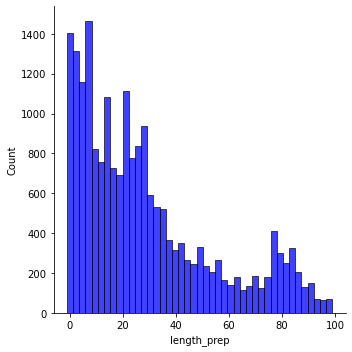

In [22]:
# removing any room searches above 100 days in advance
distribution = distribution[distribution < 100]

# creating a visual to visualize the distribution
sns.displot(x = distribution, color = 'blue')
plt.show();

In [23]:
# understanding the % of customers who want a room within 7 days or less
week = round(len(distribution[distribution <= 7])/len(distribution) * 100., 2)
# week

# understanding the % of customers who want a room within 14 days or less
two_weeks = round((len(distribution[distribution <= 14])/len(distribution) * 100) - week, 2)
# two_weeks

# understanding the % of customers who want a room within 21 days or less
three_weeks = round((len(distribution[distribution <= 21])/len(distribution) * 100) - (week+two_weeks) , 2)
# three_weeks

total_under_three = round(week + two_weeks + three_weeks, 1)

In [24]:
print(f"{week}% of Customers are searching for a room within a week")
print(f"{two_weeks}% of Customers are searching for a room within a two weeks")
print(f"{three_weeks}% of Customers are searching for a room within a three weeks")
print(f"Therefore, a total of {total_under_three}% of customers are searching for a room within three weeks or less")

23.7% of Customers are searching for a room within a week
13.46% of Customers are searching for a room within a two weeks
12.52% of Customers are searching for a room within a three weeks
Therefore, a total of 49.7% of customers are searching for a room within three weeks or less


### Key Takeaways from Searches and Time To Book

+ 23.7% of Customers are searching for a room within a week
+ 13.5% of Customers are searching for a room two weeks in advance
+ Another 12.5% of Customers are looking for a room three weeks in advance
+ In total, 49.7% of Customers are looking for rooms 1 to 3 weeks ahead of time

### Duration Periods

+ So far, the data exploration has led us to understanding how soon a customer wants a room
+ Now the next big question is, on average, how many nights are customers looking to spend during their getaway?

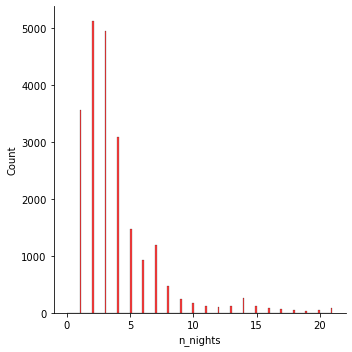

In [63]:
# creating a dataframe for only searches for 21 nights and under
searches_twentyone_under = searches[searches['n_nights'] <= 21]

# understanding the % of null values in n_nights
perc_null = round(searches['n_nights'].isnull().sum() / len(searches) * 100, 1)

# creating a visual for distribution of nights 
sns.displot(searches_twentyone_under, x = 'n_nights', color = 'red')
plt.show();

### Important Notes

+ 33.2% of number of nights searches were null, and 4.5% were for searches above 21 nights
+ For this reason, the dataset containing only searches for 21 nights and under is used


### Next

+ What is average number of nights per search?
+ What is the median number of nights per search?
+ From these numbers, what % of searches involved the answer to questions 1 and 2 above?
+ How many customers are searching for 7 nights or more?

In [82]:
# calculating the average number of nights searched for
avg_nights = round(searches_twentyone_under['n_nights'].mean(), 2)

# calculating the median number of nights searched for
median_nights = round(searches_twentyone_under['n_nights'].median(), 2)

print(f"The average number of nights per search is {avg_nights}. The median number of nights is {median_nights}")

The average number of nights per search is 3.87. The median number of nights is 3.0


### Insight

+ Based on the mean and median number of nights, let's try to understand what % of the dataset were for searches for one to four days
+ Now that we know the most common search was for 3-4 nights, what % of customers were looking for 7 or more nights?

### Next

+ What % of customer searches were for 4 nights and under? 75% as shown below
+ What % of customer searches were for a week or more? 14.2% 

In [83]:
# calculating percentage of searches 21 nights and under
perc_under_twentyone = round(len(searches_twentyone_under['n_nights']) / len(searches['n_nights']) * 100, 1)

# filtering the twenty one and under dataset for 1 to 4 nights only
one_to_four = searches_twentyone_under[(searches_twentyone_under['n_nights'] >= 1) & (searches_twentyone_under['n_nights'] <= 4)]

# calculating percentage of searches between one to four nights in the dataset of 21 days and under
perc_one_to_four = round(len(one_to_four) / len(searches_twentyone_under) * 100, 1)

# filtering the twenty one and under dataset for 7 nights or more 
over_week = searches_twentyone_under[searches_twentyone_under['n_nights'] >= 7]

# calculating percentage of searches between one to four nights in the dataset of 21 days and under
perc_over_week = round(len(over_week) / len(searches_twentyone_under) * 100, 1)

print(f"After analyzing the data, {perc_one_to_four}% were for customers searching 4 nights or less.")
print(f"{perc_over_week}% were customers searching 7 nights or more.")

After analyzing the data, 75.0% were for customers searching 4 nights or less.
14.2% were customers searching 7 nights or more.


## Understand the Timing of the Searches

+ What month are customers most interested in visting Dublin?
+ Is there a correlation between months?